In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit
from InputSimulator import make_input, make_pattern_presentation_array, copy_and_paste_jittered_pattern
from InputSimulator import triple_input_runtime, remove_close_spikes, add_noise

In [2]:
tripling = True

runduration = 450 # [second]
dt = 0.001 # [second]
number_neurons = 1000

max_time_wo_spike = 0.05 # [second]
min_rate, max_rate = 0 , 90
max_change_speed = max_rate / max_time_wo_spike # 90/0.05 = 1800 (max_S in paper)
patternlength = 0.05 # [second]
pattern_freq = 0.25


max_rate_add = 10
min_rate_add = 10
max_time_wo_spike_add = 1000
max_change_speed_add = 0

number_pat = 1000  # number of neurons that take part in the pattern presentation
spike_del = 0.01
jitter_sd = 1

## Generating Input

In [3]:
indices, times = make_input(min_rate, max_rate, max_time_wo_spike, max_change_speed, runduration, number_neurons, dt)
position_copypaste = make_pattern_presentation_array(runduration, patternlength, pattern_freq)

In [4]:
len(times), max(times)

(8108316, 149.99898604834587)

In [33]:
def plot_input(times, indices, times_pattern=None, indices_pattern=None):
    sampletimes = times[(times < 0.6) & (indices < 100)]
    sampleindices = indices[(times < 0.6) & (indices < 100)]
    
    intervals = np.arange(0, 0.61, 0.05)
    colors = ['#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#08519c']
    num_colors_needed = len(intervals) - 1
    num_colors_available = len(colors)
    colors = [colors[i % num_colors_available] for i in range(num_colors_needed)]
    for i in range(len(intervals) - 1):
        plt.axvline(intervals[i+1])
        plt.axvspan(intervals[i], intervals[i + 1], facecolor=colors[i], alpha=0.7)
    plt.plot(sampletimes, sampleindices, '.k', alpha=0.6)
    if times_pattern is not None and indices_pattern is not None:
        sampletimespattern = times_pattern[(times_pattern < 0.6) & (indices_pattern < 100)]
        sampleindicespattern = indices_pattern[(times_pattern < 0.6) & (indices_pattern < 100)]
        plt.plot(sampletimespattern, sampleindicespattern, '.r', alpha=0.6)
    plt.show()

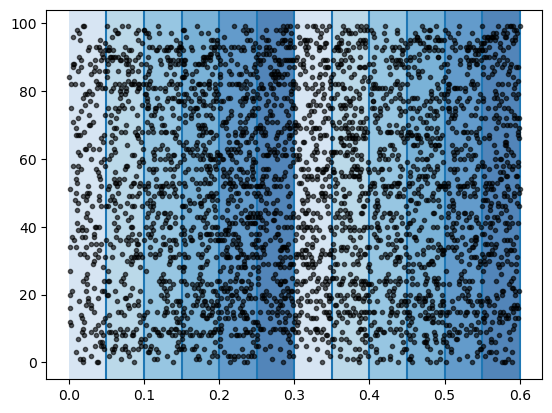

In [29]:
plot_input(times, indices)

In [5]:
indices, times, (indices_pattern, times_pattern) = copy_and_paste_jittered_pattern(times, indices, position_copypaste, patternlength, jitter_sd, spike_del,number_pat)
indices_add, times_add = make_input(min_rate_add, max_rate_add, max_time_wo_spike_add,
                                max_change_speed_add, runduration, number_neurons, dt)
times, indices = add_noise(times, indices, times_add, indices_add)
if tripling and runduration > 300:
        times, indices = triple_input_runtime(times, indices)
        position_copypaste = np.concatenate((position_copypaste, position_copypaste, position_copypaste))
times, indices = remove_close_spikes(times, indices, dt)

# patneurons = range(0, number_pat)
# nonpatneurons = range(number_pat, number_neurons)

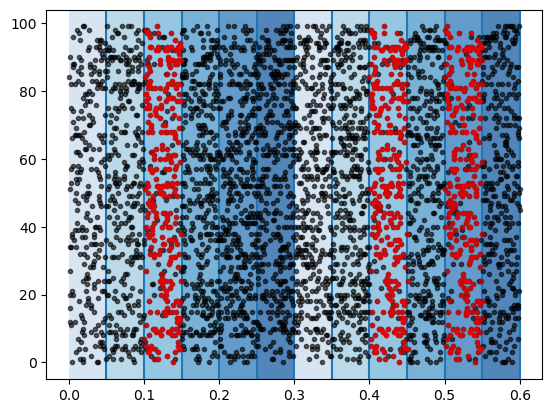

In [32]:
plot_input(times, indices, times_pattern, indices_pattern)

In [7]:
# what I obtain is times, indices
len(times), max(times)

(24843837, 449.99898604834584)

In [10]:
print(times[3500:3505])
print(indices[3500:3505])

[0.08484388 0.08485141 0.08486469 0.08486529 0.08490249]
[216. 316. 896. 536. 985.]


In [ ]:
tau_pos = 
A_pos = 
tau_neg = 
A_neg = 

V = np.zeros()

In [ ]:
for t in times:
    if tr> 0:
        

## Generating Input Functions 

In [ ]:
def make_input(min_rate, max_rate, max_time_wo_spike, max_change_speed, runduration, number_neurons, dt):
    spiketimes, indices = [], []
    for n in range(number_neurons):
        st = np.array(make_single_train(min_rate, max_rate, max_time_wo_spike, max_change_speed, dt, np.random.randint(2**30)))
        spiketimes.append(st)
        indices.append(n * np.ones(len(st)))

    spiketimes = np.hstack(spiketimes)
    indices = np.hstack(indices)
    sortarray = np.argsort(spiketimes)
    spiketimes = spiketimes[sortarray]
    indices = indices[sortarray]
    return indices, spiketimes

In [ ]:
@jit(nopython=True)
def make_single_train(min_rate, max_rate, max_time_wo_spike, max_change_speed, dt, random_seed):
    np.random.seed(int(random_seed))
    runduration1 = min(runduration, 150) # [second]
    st = []
    virtual_pre_sim_spike = - np.random.rand() * max_time_wo_spike # in [-0.05, 0]
    firing_rate = min_rate * np.random.rand() * (max_rate - min_rate) # in [0, 90]
    rate_change = 2 * (np.random.rand() - 0.5) * max_change_speed # in [-1800,1800]

    mtws = max_time_wo_spike # 0.05 [seocnds]


    # probability of spiking for the second line of the condition in first iteration is
    # if np.random.rand() > 0.98 which is only 2%
    # and if np.random.rand() < 0.98 which is 98% it does not.
    # it increases 2% at each iteration until iteration 50 with 
    # probability of 100% if there has been no spike yet!

    # for the third line of the condition, if the neuron has not spiked
    # for the last 50 ms or 0.050 seconds then it will definitely will spike

    for t in np.arange(dt, runduration1, dt):
        if np.random.rand() < dt * firing_rate or \
        (len(st) < 1 and t - virtual_pre_sim_spike > mtws) or \
        (len(st) > 0 and t - st[-1] > mtws):
            tmp = t - np.random.rand() * dt ## this makes firing time continuous, not discrete
            if tmp < 0 or tmp > runduration1:
                raise ValueError(f'tmp = {tmp} (tmp<0 or tmp>{runduration1} violated)')
            tmp = max(0, tmp)
            # tmp = min(runduration1, tmp)
            st. append(tmp)
        firing_rate = firing_rate + rate_change * dt
        rate_change = rate_change + 1/5 * 2 * (np.random.rand() - 0.5) * max_change_speed
        rate_change = max(min(rate_change,max_change_speed), -max_change_speed)
        firing_rate = max(min(firing_rate, max_rate), min_rate)
    return st

In [ ]:
def make_pattern_presentation_array(runduration, patternlength, pattern_freq):
    runduration1 = min(runduration, 150)
    if pattern_freq == 0.5:
        position_copypaste = np.array([0,1] * runduration1 * int(pattern_freq / patternlength))
    else:
        position_copypaste = np.zeros(int(runduration1 / patternlength))
        while sum(position_copypaste) < np.floor(int(runduration1 / patternlength) * pattern_freq):
            random_index = np.random.randint(0, len(position_copypaste))
            if position_copypaste[random_index] == 0:
                if random_index > 0 and random_index < int(runduration1 / patternlength) -1 and \
                 position_copypaste[random_index - 1] == 0 and \
                 position_copypaste[random_index + 1] == 0:
                    position_copypaste[random_index] = 1
                elif random_index == 0 and position_copypaste[random_index + 1] == 0:
                    position_copypaste[random_index] = 1
                elif random_index == int(runduration1 / patternlength) - 1 and position_copypaste[random_index - 1] == 0:
                    position_copypaste[random_index] = 1
    return position_copypaste

In [ ]:
def copy_and_paste_jittered_pattern(times, indices, position_copypaste, patternlength, jitter_sd, spike_del,
                                    number_pat):

    startCPindex = np.where(position_copypaste == 1)[0][0]
    tim = times[np.searchsorted(times, startCPindex * patternlength):np.searchsorted(times, (startCPindex + 1)* patternlength)]
    ind = indices[np.searchsorted(times, startCPindex * patternlength):np.searchsorted(times, (startCPindex + 1)* patternlength)]
    tim = tim[ind < number_pat]
    ind = ind[ind < number_pat]
    # to have just the time which will be added to every pattern window 
    tim -= startCPindex * patternlength

    indices_final, times_final = [], []
    indices_pattern, times_pattern = [], []
    for position_index, position_value in enumerate(position_copypaste):
        ind1 = np.copy(ind)
        tim1 = np.copy(tim)
        if position_value == 1: # pattern is present
            if spike_del > 0:
                keep_array = np.random.rand(len(tim))
                keep_array = keep_array > spike_del
                ind1 = ind[keep_array]
                tim1 = tim[keep_array]
                # add random spikes to the same neuron to keep the spike density constant
                ind1_add = ind[np.invert(keep_array)]
                tim1_add = np.random.rand(sum(np.invert(keep_array))) * patternlength
                ind1 = np.concatenate((ind1, ind1_add))
                tim1 = np.concatenate((tim1, tim1_add))
            indices_final.append(ind1)
            indices_pattern.append(ind1)
            if jitter_sd > 0:
                jitter = np.random.normal(0, jitter_sd, len(tim1))
            else:
                jitter = np.zeros(len(tim1))
            tim_jit = tim1 + jitter / 1000 ## 
            # if we are at the start of the simulation, avoid negative spike times
            if position_index == 0:
                tim_jit[tim_jit < 0] = 0
            
            times_final.append(tim_jit + position_index * patternlength)
            times_pattern.append(tim_jit + position_index * patternlength)
            start_pattern = np.searchsorted(times, position_index * patternlength)
            end_pattern = np.searchsorted(times, (position_index + 1) * patternlength)
            tim_npat = times[start_pattern:end_pattern]
            ind_npat = indices[start_pattern:end_pattern]
            indices_final.append(ind_npat[ind_npat >= number_pat])
            times_final.append(tim_npat[ind_npat >= number_pat])
        else:
            # find index where pattern window starts
            start_pattern = np.searchsorted(times, position_index * patternlength)
            # find index where pattern window ends
            end_pattern = np.searchsorted(times, (position_index + 1) * patternlength)
            indices_final.append(indices[start_pattern:end_pattern])
            times_final.append(times[start_pattern:end_pattern])
        
    indices_final = np.hstack(indices_final)
    times_final = np.hstack(times_final)
    # sort input accordint to time
    sortarray = times_final.argsort()
    indices_final = indices_final[sortarray]
    times_final = times_final[sortarray]

    indices_pattern = np.hstack(indices_pattern)
    times_pattern = np.hstack(times_pattern)
    # sort input accordint to time
    sortarray = times_pattern.argsort()
    indices_pattern = indices_pattern[sortarray]
    times_pattern = times_pattern[sortarray]
    return indices_final, times_final, (indices_pattern, times_pattern)


In [ ]:
def add_noise(times, indices, times_add, indices_add):
    # combine the basic activity and the 10Hz additional noise to one input
    times = np.concatenate((times, times_add))
    indices = np.concatenate((indices, indices_add))
    sortarray = np.argsort(times)
    times = times[sortarray]
    indices = indices[sortarray]
    return times, indices


def triple_input_runtime(times, indices):
    # To shorten time spent on creating input, 150s input is tripled to give 450s
    times = np.concatenate((times, times + 150, times + 300))
    indices = np.concatenate((indices, indices, indices))
    return times, indices

@jit(nopython=True)
def remove_close_spikes(times, indices, dt):
    # remove spikes that are too close in time, depends on time resolution chosen for simulation
    last_spike = -2 * np.ones(int(np.amax(indices) + 1))
    keep_flag = np.ones(len(times), dtype=np.bool_)
    # calculations of spike distance
    for j, st in enumerate(times):
        if st - last_spike[int(indices[j])] < dt:
            keep_flag[j] = False
        else:
            last_spike[int(indices[j])] = st
    # print('    Number of spikes to be deleted: ', len(indices) - sum(keep_flag), 'or', round(100*(len(indices) - sum(keep_flag))/len(indices), 2), '%')
    times = times[keep_flag]
    indices = indices[keep_flag]
    return times, indices
